In [44]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import statsmodels 
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

# Numpy
Numpy主要用于处理数组（Array）的数据分析。本门课主要使用numpy内置的数学函数与统计函数（如计算平均值、方差、标准差等）

In [2]:
sample_array = np.array([1,2,3,4,5])
sample_array

array([1, 2, 3, 4, 5])

In [3]:
np.mean(sample_array)

3.0

In [4]:
np.std(sample_array,ddof=0)

1.4142135623730951

In [5]:
np.std(sample_array,ddof=1)

1.5811388300841898

In [6]:
np.max(sample_array)


2.5

In [ ]:
np.min(sample_array)


In [ ]:
np.median(sample_array)


In [18]:
np.var(sample_array,ddof=0)


2.0

In [19]:
np.var(sample_array,ddof=1)

2.5

# Scipy

基于Numpy开发的，本门课主要使用其stats模块。在计算各类分布的概率时使用到；另外独立样本t检验、卡方检验等部分也使用到

In [55]:
# 某数据服从正态分布，且均值为100，标准差为10.求P(X < 75)
stats.norm.cdf(x=75, loc=100,scale=10)

0.006209665325776132

In [53]:
# 某数据服从正态分布，且均值为100，标准差为10.已知P(X < X_0)=0.98，求X_0的值
stats.norm.ppf(q = 0.98,loc =100, scale =10)

120.53748910631822

In [66]:
stats.norm.ppf(q = 0.025)

-1.9599639845400545

In [58]:
stats.t.ppf(q = 0.025,df =9)

-2.262157162740992

In [59]:
stats.f.ppf(q = 0.025,dfn =9 ,dfd=9)

0.24838585469445487

In [63]:
stats.chi2.ppf(q = 0.95,df =1 )

3.841458820694124

# Pandas

主要用来处理表格数据

## 创建DataFrame

In [11]:
sample_df = pd.DataFrame({
    'col1' : sample_array, 
    'col2' : sample_array * 2,
    'col3' : ["A", "B", "C", "D", "D"]
})

In [12]:
sample_df

,col1,col2,col3
0,1,2,A
1,2,4,B
2,3,6,C
3,4,8,D
4,5,10,D


## 读取文件中的数据


In [21]:
file_data = pd.read_excel("https://raw.githubusercontent.com/zhiliang-lin/survey_and_stats/main/sati-survey/data/inm.xlsx")


## DataFrame的列操作


In [17]:
sample_df

,col1,col2,col3
0,1,2,A
1,2,4,B
2,3,6,C
3,4,8,D
4,5,10,D


In [10]:
sample_df.col2

0     2
1     4
2     6
3     8
4    10
Name: col2, dtype: int32

In [11]:
sample_df["col2"]

0     2
1     4
2     6
3     8
4    10
Name: col2, dtype: int32

In [12]:
sample_df[["col2", "col3"]]

,col2,col3
0,2,A
1,4,B
2,6,C
3,8,D
4,10,E


## DataFrame的行操作

In [13]:
sample_df.head(n = 3)

,col1,col2,col3
0,1,2,A
1,2,4,B
2,3,6,C


In [14]:
sample_df[sample_df.col2 > 4]

,col1,col2,col3
2,3,6,C
3,4,8,D
4,5,10,E


In [8]:
sample_df.iloc[1:3]

,col1,col2,col3
1,2,4,B
2,3,6,C


## DataFrame的统计分析

In [13]:
sample_df['col3'].value_counts()

D    2
A    1
B    1
C    1
Name: col3, dtype: int64

In [16]:
sample_df["col1"].mean()

3.0

In [17]:
sample_df["col1"].var()

2.5

In [20]:
sample_df["col1"].std()

1.5811388300841898

## DataFrame的分类汇总

In [67]:
sample_df.groupby(by = "col3").mean()

,col1,col2
col3,,
A,1.0,2.0
B,2.0,4.0
C,3.0,6.0
D,4.5,9.0


In [69]:
pd.pivot_table(sample_df,index=["col3"],values=["col1","col2"],aggfunc=np.mean)

,col1,col2
col3,,
A,1.0,2
B,2.0,4
C,3.0,6
D,4.5,9


# Statsmodels
本门课主要在回归分析部分用到

# pingouin
相对前面的包不是很有名，但是有的统计方法前述包没有涉及到，该包是一个比较好的补充。

# Matplotlib
画图用的，画的图不是特别好看，但胜在灵活性较高

Text(0.5, 1.0, 'histgram of col1')

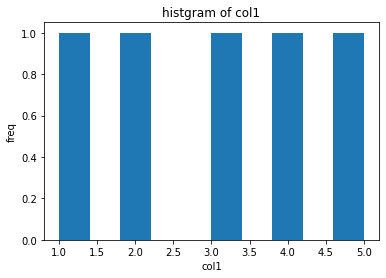

In [75]:
plt.hist(sample_df.col1)
# plt.xlabel("col1")
# plt.ylabel("freq")
# plt.title("histgram of col1")


<AxesSubplot: ylabel='Frequency'>

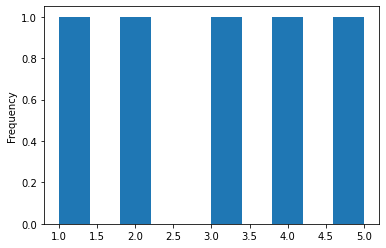

In [43]:
sample_df["col1"].plot.hist()

In [30]:
table = sample_df.value_counts("col3")
table

col3
D    2
A    1
B    1
C    1
dtype: int64

<AxesSubplot: >

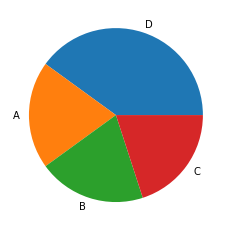

In [35]:
table.plot.pie()

<AxesSubplot: xlabel='col3'>

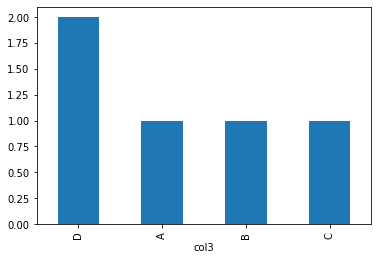

In [36]:
table.plot.bar()

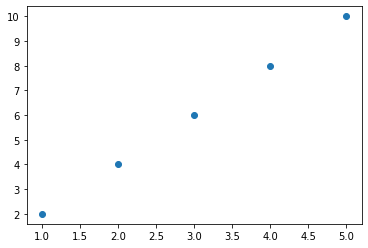

In [27]:
plt.scatter(sample_df.col1,sample_df.col2)

# Seaborn
语法较matplotlib简洁，画出来的图也比较漂亮，用来画统计相关的图表比较matplotlib更漂亮

<AxesSubplot: xlabel='col1', ylabel='Count'>

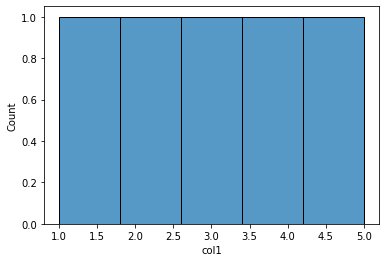

In [24]:
sns.histplot(x = "col1", data=sample_df,bins=5)

<AxesSubplot: xlabel='col3', ylabel='count'>

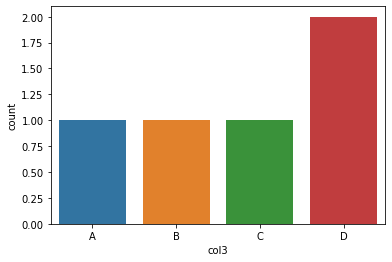

In [28]:
sns.countplot(x = "col3", data=sample_df)

<AxesSubplot: xlabel='col1', ylabel='col2'>

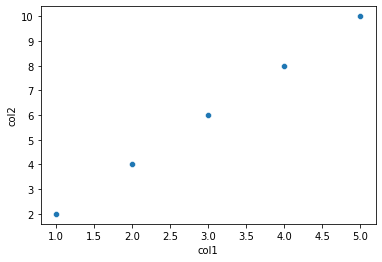

In [26]:
sns.scatterplot(x="col1", y="col2",data=sample_df)

# 其它
部分地方使用Python内置的包，如在正态分布部分使用到statistics